# 12 steps to Navier–Stokes

## Step 1: 1-D Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model that can be used to learn something about CFD.

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (understood as a *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. 

Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

We discretize this equation in both space and time.

- $x$ discrete space coordinate: $x_i = x_0 + i \Delta x$
- $t$ discrete time coordinate: $t_n = t_0 + n \Delta t$

$$u_{i}^{n} = u(x_i, t_n)$$


Forward Difference scheme for the time derivative:

$$
\left.\frac{\partial u}{\partial t}\right|_{(x_i, t_n)} \approx \frac{u(x_i, t_n+\Delta t)-u(x_i, t_n)}{\Delta t} = \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}
$$

Backward Difference scheme for the space derivative:

$$
\left.\frac{\partial u}{\partial x}\right|_{(x_i, t_n)} \approx \frac{u(x_i, t_n)-u(x_i-\Delta x, t_n)}{\Delta x} = \frac{u_{i}^{n}-u_{i-1}^{n}}{\Delta x}
$$

Then, our discrete equation is:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 $$

Where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$.  We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

Let's try implementing this in Python.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys

Let's define a few variables; we want to define an evenly spaced grid of points within a spatial domain that is 2 units of length wide, i.e., $x_i\in(0,2)$.  We'll define a variable `nx`, which will be the number of grid points we want and `dx` will be the distance between any pair of adjacent grid points.  

In [ ]:
x_end = 2
nx = 81  
dx = x_end / (nx-1)
x = np.linspace(0, x_end, nx)

t_end = 0.625
nt = 25    
dt = t_end / nt
t = np.linspace(0, t_end, nt)

c = 1      #assume wavespeed of c = 1

print(dt)

0.025


We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [ ]:
u0 = np.ones(nx)
u0[(0.5 <= x) & (x <= 1)] = 2
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Let's take a look at those initial conditions.

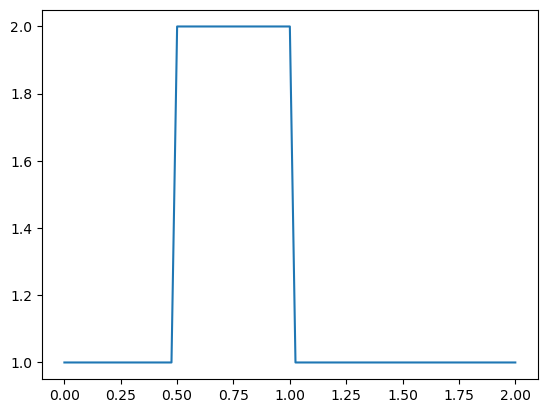

In [ ]:
plt.plot(x, u0);

Now it's time to implement the discretization of the convection equation using a finite-difference scheme.  

For every element of our array `u`, we need to perform the operation $$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$

We first initialize our placeholder array `un` to hold the values of 1.

Then, we may think we have two iterative operations: one in space and one in time, so we'll start by nesting one loop inside the other. We will iterate through the `u` array, but we'll be skipping the first element.

In [ ]:
un1 = u0.copy()

for n in range(nt):
    un = un1.copy()
    for i in range(1, nx):
        un1[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

u = un1

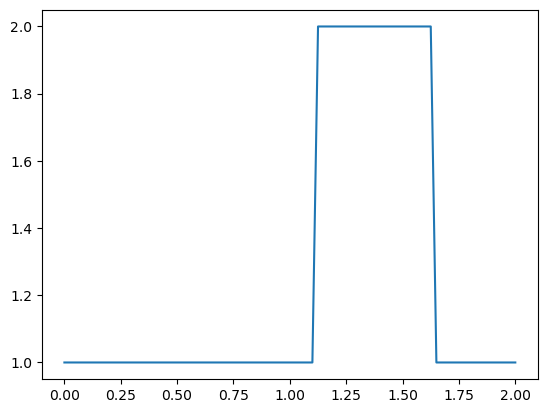

In [ ]:
plt.plot(x, u);